<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Evaluaciones/EvaluacionFinal_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen Final:

Métodos Computacionales para físicos



Nota: La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno.




Las aletas son sólidos que transfieren calor por conducción a lo largo de su geometría y por convección a través de su entorno. La ecuación diferencial que describe la temperatura como función de  la longitud de una  aleta viene dada por :


\begin{equation}
\frac{d^2(T-T_{\infty})}{dx^2} - \left( \frac{hp}{kAc} \right ) ^2 (T-T_{\infty})=0
\end{equation}

donde Ac es el  área de la sección transversal Ac, p es perímetro,
k es el coficiente de conducción que depende de cada material y h el coficiente de convección. La temperatura  $T_{\infty}$ es la temperatura ambiente.


![aleta](https://github.com/hernansalinas/autogradesMetodosComputacionales/blob/main/Evaluaciones/img/aleta.png?raw=true)



En general, el área de la sección transversal A y el perímetro p de una aleta
varían con x, lo cual hace que esta ecuación diferencial sea difícil de resolver. En el caso especial de una sección transversal constante y conductividad térmica constante, la ecuación diferencial se reduce a

\begin{equation}
\frac{d^2 \theta}{dx^2} - a ^2 \theta=0
\end{equation}


donde  $\theta=T-T_{\infty}$ y $a=\frac{hp}{kAc}$


Para una aleta suficientemente larga de sección transversal uniforme (Ac =
constante), la temperatura en la base de la aleta viene dada por:


\begin{equation}
\theta(0)=\theta_b=T_b-T_{\infty}
\end{equation}


 y en la punta de la aleta, tenderá a la del medio, por consiguiente $\theta$ tenderá a cero.

\begin{equation}
\theta(L)=T(L)-T_{\infty}=0
\end{equation}

La solucion  exacta viene dada por :

\begin{equation}
T(x)=T_{\infty}+(T_b-T_{\infty})e^{-x\sqrt{hp/kAc}}
\end{equation}



Considerando  una aleta rectangular muy larga, fijada a una
superficie plana de tal forma que la temperatura en el extremo
de la aleta es prácticamente la del aire circundante, es decir,
$T_{\infty}=300K$. Asuma que el ancho es de 5.0 cm, el espesor de 1 mm, es decir, su area $A=5\times 10^{-5}m^2$ y su perimetro de $p=0.102m$. La  conductividad térmica es $k=200 W/m K$, la temperatura en la base de $T_b=313K$ y el coeficiente de transferencia de calor es de $h=20 W/m^2K$. Calcule:



1 (30%) La solución numérica de la ecuación diferencial.

2 (20%) Construya un gráfico de  la temperatura de la aleta como función de la longitud de la aleta

3 (25%) Compare la solución numérica con la analítica

4 (25%) Empleando el método de newton detetermine el punto de la aleta para la cual la temperatura es de 305K





Referencias: Ejercicio e imagenes tomado y adaptado de:

Cengel, Y. A. (2016). “Transferencia de calor y masa” McGRAW-HILL/INTERAMERICANA EDITORES, S.A. DE C.V. 3ra. Edición



**SOLUCION POR ODEINT**

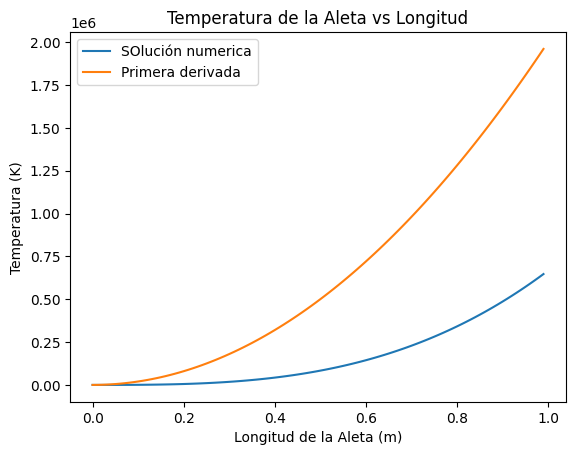

In [57]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir la función del sistema de ecuaciones diferenciales
def sistema(y, t):
    x, v = y
    dydt = [v, t*a**2]
    return dydt

# Condiciones iniciales
x0 = 13  # posición inicial
v0 = 0.0  # velocidad inicial
y0 = [x0, v0]

# Parámetros del sistema
T_infinito = 300
A = 5e-5
p = 0.102
k = 200
Tb = 313
h = 20

a = h * p / (k * A * p)

# variable independiente
t = np.arange(0, 1, 0.01)

# Resuelve el sistema de ecuaciones diferenciales
sol = odeint(sistema, y0, t)

# Extrae las soluciones para x y v
x, v = sol.T

# Grafica la solución
plt.plot(t, x, label='SOlución numerica')
plt.plot(t, v, label='Primera derivada')
plt.xlabel('Longitud de la Aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura de la Aleta vs Longitud')
plt.legend()
plt.show()

**SOLUCIÓN POR EULER**

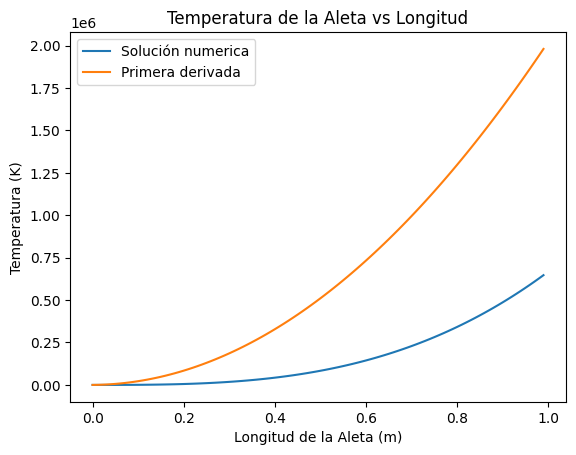

In [56]:

import numpy as np
import matplotlib.pyplot as plt

#Parámetros dados
T_infinito = 300
A = 5e-5
p = 0.102
k = 200
Tb = 313
h = 20



delta = 0.01

t = np.arange(0,1,delta)

x_sig = np.zeros(len(t))
u_sig = np.zeros(len(t))


#Condiciones iniciales
x_ant = 13
u_ant = 0

a = h * p / (k * A * p)

for i in range(0,len(t)):

    x_sig[i] = x_ant + delta * u_ant
    u_sig[i] = u_ant + delta * t[i]*a**2

    u_ant = u_sig[i]
    x_ant = x_sig[i]



plt.plot(t,x_sig,label='Solución numerica')
plt.plot(t,u_sig,label='Primera derivada')
plt.xlabel('Longitud de la Aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Temperatura de la Aleta vs Longitud')
plt.legend()
plt.show()





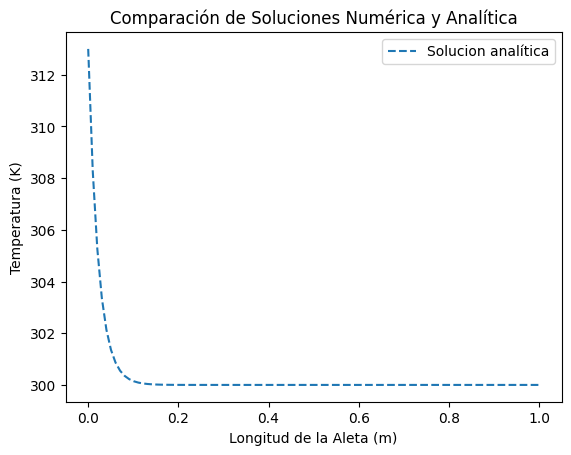

In [58]:
# Solución analítica
x_analitica = np.linspace(0, L, 100)
theta_analitica = T_infinito+ (Tb - T_infinito) * np.exp(-x_analitica * np.sqrt(h * p / (k * A * p)))

# Gráfico comparativo
#plt.plot(x, theta_numerica, label='SOlucion numerica')
plt.plot(x_analitica, theta_analitica, label='Solucion analítica', linestyle='--')
plt.xlabel('Longitud de la Aleta (m)')
plt.ylabel('Temperatura (K)')
plt.title('Comparación de Soluciones Numérica y Analítica')
plt.legend()
plt.show()

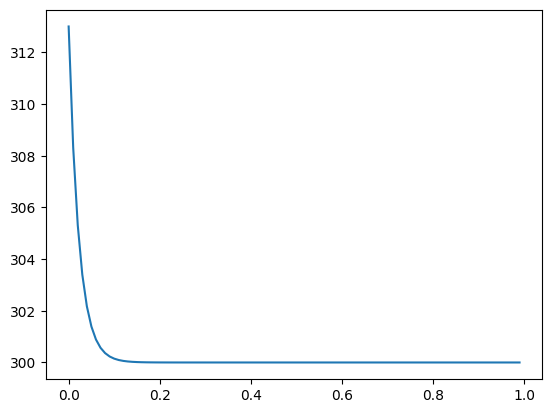

In [35]:

def f(x):
    return 300 + (313 - 300) * np.exp(-x * np.sqrt(h * p / (k * A * p)))

x = np.arange(0,1,0.01)

plt.plot(x,f(x))

**Metodo de Newton**

In [59]:
from scipy.optimize import newton

# Función objetivo para el método de Newton
def f(x):
    return T_infinito + (Tb - T_infinito) * np.exp(-x * np.sqrt(h * p / (k * A * p))) - 305

# Adivinanza inicial para el método de Newton
inicial= 0.5

# Aplicar el método de Newton
x_305K = newton(f, inicial)

print(f'La longitud de la aleta para la cual la temperatura es de 305K es: {x_305K:.4f} metros')

La longitud de la aleta para la cual la temperatura es de 305K es: 0.5001 metros


<ipython-input-59-1748a684c08c>:5: RuntimeWarning: overflow encountered in exp
  return T_infinito + (Tb - T_infinito) * np.exp(-x * np.sqrt(h * p / (k * A * p))) - 305
